<a href="https://colab.research.google.com/github/sosucat/sbl-optimizer-colab/blob/main/sbl_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📄 sbl-optimizer: Print Pattern Optimizer for Swell by Light
[![PyPI version](https://badge.fury.io/py/sbl-optimizer.svg)](https://badge.fury.io/py/sbl-optimizer)
[![GitHub](https://img.shields.io/badge/GitHub_repo-black?logo=github)](https://github.com/sosucat/sbl-optimizer)

[![Homepage](https://img.shields.io/badge/🔗_Homepage-black)](https://sites.gatech.edu/futurefeelings/2025/03/07/swell-by-light-tei-25/)
[![Author](https://img.shields.io/badge/Author-black?logo=googlescholar&logoColor=white)](https://sosuke-ichihashi.com/)
[![Research paper](https://img.shields.io/badge/Research_Paper-black?logo=acm)](https://doi.org/10.1145/3689050.3704420)
[![Fabrication](https://img.shields.io/badge/🔗_Fabrication-black)](https://sites.gatech.edu/futurefeelings/2025/07/23/make-puffy-patterns-with-light/)
[![Watch fabrication demo on YouTube](https://img.shields.io/badge/Fabrication-750014?logo=youtube)](https://youtu.be/LomVS_jHxl0?feature=shared)

Welcome to **sbl-optimizer**, a friendly tool that turns your images into printable patterns for fun raised textures!  
Anyone—even with zero coding experience—can upload a picture, click Run, and get an optimized pattern you can print, shine light, and watch pop up like magic.

![A printed pattern's shades change as the optimization progresses, and the resulting temperature distribution gets closer to the intended pattern.](https://sites.gatech.edu/futurefeelings/files/2025/03/opt_step.gif)

Optimization of the printed pattern results in a uniform temperature pattern closely matching the original pattern.


---

## 📑 Table of Contents
1. [Setup & Installation](#scrollTo=vkd63QF86-g3)  
2. [Library & Function Imports](#scrollTo=mHjEnEtZ7azV)  
3. [Quick Start: Optimize Sample Pattern](#scrollTo=jEwPKC3COIbX)  
4. [Optimize Your Pattern](#scrollTo=ay2GXkzFPJuT)  
5. [Change Settings](#scrollTo=uHP6gd2SYqIg)  
6. [Troubleshooting & FAQ](#scrollTo=-pFXIm8gfsJX)
7. [Credits & License](#scrollTo=q2DhdMj88Kec)
8. [Next Step](#scrollTo=af-mVoGqfRIf)

---

## 1. Setup & Installation
> We install the package.

In [3]:
# Install the latest version from PyPI
!pip install sbl-optimizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 773.7 kB/s eta 0:00:00


## 2. Library & Function Imports

> We install necessary libraries and functions.

In [4]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import importlib.resources as pkg_resources
from google.colab import files
from IPython.display import IFrame, display, Javascript
import base64

from sbl_optimizer.config import Config
from sbl_optimizer.heat_solver import image_to_heat_pattern, optimize
from sbl_optimizer.utils import compute_dims
from sbl_optimizer.io import save_pattern, save_plots

##3. Quick Start: Optimize Sample Pattern
**Overview:** We walk through how to optimize patterns and download the results.
1. ⚙️ Load Default Settings
2. 🖼️ Load Sample Image
3. 🔧 Prepare for Optimization
4. 👀 Preview Prepared Image
5. 🔁 Run Optimization
6. 👀 Save & Preview Optimized Pattern
7. 👀 Show Swell Pattern & Temperature Distribution
8. 💾 Download Optimized Pattern
9. 📉 (Optional) Show Optimization Performance

### 3-1. ⚙️ Load Default Settings


> Here, we pull in the ready-to-use configuration (like target temperature and resolution) so the optimizer knows exactly how to process your image.



In [5]:
# Locate the bundled config.json inside the installed package
def get_default_config_path():
    return pkg_resources.as_file(
        pkg_resources.files("sbl_optimizer.assets") / "config.json"
    )

with get_default_config_path() as config_path:
    with open(config_path) as f:
        cfg_data = json.load(f)

print("Default configuration:")
for k, v in cfg_data.items():
    print(f"- {k}: {v}")

# Create Config object
cfg = Config.from_file(config_path)

Default configuration:
- swell_temperature: 145.0
- light_power: 100.0
- light_diameter: 0.06
- alpha: 5e-07
- verbose: 1
- resolution: 120000


### 3-2. 🖼️ Load Sample Image
> We open a built-in example picture—no uploads needed—so you can see the whole workflow right away.

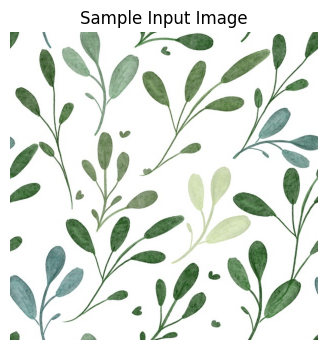

In [6]:
with pkg_resources.as_file(
    pkg_resources.files("sbl_optimizer.assets") / "sample.jpg"
) as sample_img_path:
    img = Image.open(sample_img_path)
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Sample Input Image")
    plt.show()

### 3-3. 🔧 Prepare for Optimization


> This step turns the image black-and-white for Swell by Light, applying any pre-processing like resizing or normalization.


In [7]:
mask, H_init, max_heat = image_to_heat_pattern(sample_img_path, cfg)

### 3-4. 👀 Preview Prepared Image
> See the processed sample image before any changes. This is the "before" so you can compare with the "after" later.



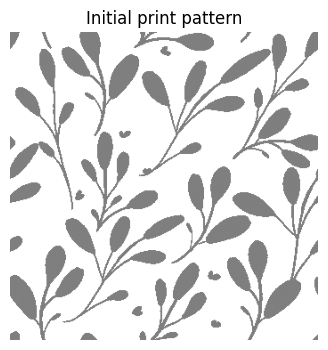

In [8]:
# Visualize the initialized print pattern using matplotlib
def visualize_init_pattern(H_init, max_heat):
  plt.figure(figsize=(4,4))
  plt.imshow(H_init/max_heat, cmap='gray_r', vmin=0.0, vmax=1.0)
  plt.axis('off')
  plt.title("Initial print pattern")
  plt.show()

visualize_init_pattern(H_init, max_heat)

### 3-5. 🔁 Run Optimization

> This process adjusts the sample image into a print-ready pattern that compensates for heat spread. This is where the magic happens! "Optimization" here means transforming darker/lighter areas so that after heating, the texture matches your original design.


In [9]:
%%time
# Set the maximum height of the output
display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'))

# Compute physical dimensions (for logging)
img_w, img_h, phys_w, phys_h = compute_dims(Image.open(sample_img_path))

# Optimize
T_best, H_best, errors = optimize(mask, H_init, max_heat, img_w, img_h, phys_w, phys_h, cfg)
print(f"Optimization completed in {len(errors)} iterations.")

<IPython.core.display.Javascript object>

2025-08-01 17:09:53,067 [INFO] Iteration 1: Outlier = 25%
2025-08-01 17:09:54,259 [INFO] Iteration 2: Outlier = 24%
2025-08-01 17:09:55,587 [INFO] Iteration 3: Outlier = 17%
2025-08-01 17:09:57,104 [INFO] Iteration 4: Outlier = 14%
2025-08-01 17:09:58,403 [INFO] Iteration 5: Outlier = 14%
2025-08-01 17:09:59,658 [INFO] Iteration 6: Outlier = 13%
2025-08-01 17:10:00,582 [INFO] Iteration 7: Outlier = 12%
2025-08-01 17:10:01,299 [INFO] Iteration 8: Outlier = 12%
2025-08-01 17:10:02,056 [INFO] Iteration 9: Outlier = 12%
2025-08-01 17:10:02,849 [INFO] Iteration 10: Outlier = 12%
2025-08-01 17:10:03,527 [INFO] Iteration 11: Outlier = 12%
2025-08-01 17:10:04,233 [INFO] Iteration 12: Outlier = 12%
2025-08-01 17:10:04,961 [INFO] Iteration 13: Outlier = 12%
2025-08-01 17:10:05,610 [INFO] Iteration 14: Outlier = 11%
2025-08-01 17:10:06,335 [INFO] Iteration 15: Outlier = 11%
2025-08-01 17:10:07,018 [INFO] Iteration 16: Outlier = 11%
2025-08-01 17:10:07,670 [INFO] Iteration 17: Outlier = 11%
2025-0

Optimization completed in 173 iterations.
CPU times: user 1min 26s, sys: 0 ns, total: 1min 26s
Wall time: 1min 31s


###3-6. 👀 Save and Preview Optimized Pattern

> We save your optimized pattern as a PDF and show it on screen so you can check.



In [10]:
# Save pattern PDF
pattern_pdf = save_pattern(sample_img_path, H_best, max_heat)
print(f"Saved optimized pattern to: {pattern_pdf}")

# Display the generated PDF inline in Colab
with open(pattern_pdf, "rb") as pdf_file:
    encoded_pdf = base64.b64encode(pdf_file.read()).decode('utf-8')
IFrame(f"data:application/pdf;base64,{encoded_pdf}", width=400, height=400)

Saved optimized pattern to: /content/sample_opt.pdf


### 3-7. 👀 Show Swell Pattern and Temperature Distribution

> See side-by-side visualizations of the final raised texture (swell pattern) and temperature across the sheet (temperature distribution).



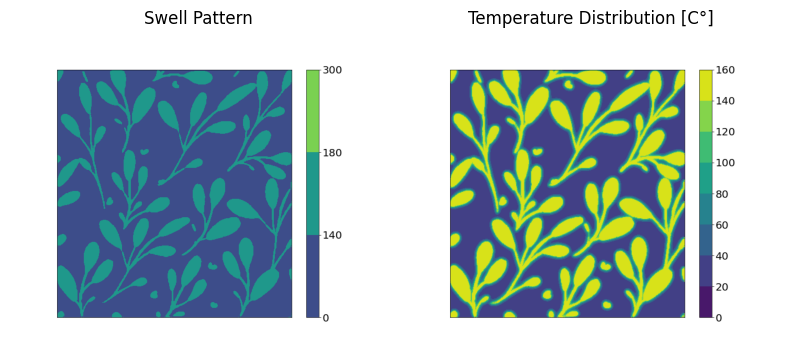

In [11]:
def display_plots(plots):
  fig, (ax_swell, ax_temperature) = plt.subplots(1, 2, figsize=(4 * 2, 4))

  img_plot = Image.open(plots[0])
  ax_swell.imshow(img_plot)
  ax_swell.axis('off')
  ax_swell.set_title('Swell Pattern')

  img_plot = Image.open(plots[1])
  ax_temperature.imshow(img_plot)
  ax_temperature.axis('off')
  ax_temperature.set_title('Temperature Distribution [C°]')

  plt.tight_layout()
  plt.show()

# Save and display plots with matplotlib
plots = save_plots(T_best, phys_w, phys_h, sample_img_path, dpi=72)
display_plots(plots)

### 3-8. 💾 Download Optimized Pattern

> Finally, grab the PDF file you just created. You’re ready to print and experiment!

In [12]:
# Ask user if they want to download the PDF locally
def download_pdf(pdf_file):
  download_choice = input('Do you want to download the optimized PDF? (y/n): ').strip().lower()
  if download_choice == 'y':
      files.download(str(pdf_file))

download_pdf(pattern_pdf)

Do you want to download the optimized PDF? (y/n): y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###3-9. 📉 (Optional) Show Optimization Performance

> If you are curious, check out simple metrics or logs showing how many iterations the optimizer ran and how it improved the pattern.

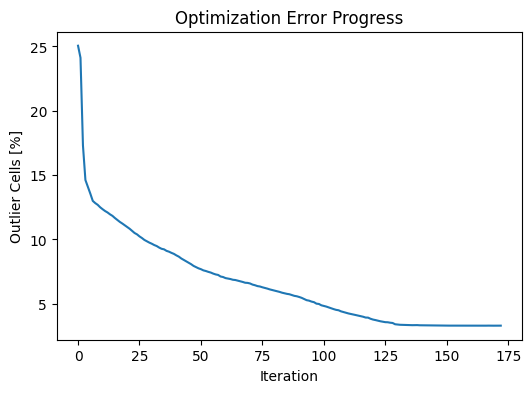

In [13]:
# Plot normalized error progression over iterations
def plot_error_progression(errors, cfg):
  errors_norm = [e * 100 / cfg.resolution for e in errors]
  plt.figure(figsize=(6,4))
  plt.plot(errors_norm)
  plt.xlabel('Iteration')
  plt.ylabel('Outlier Cells [%]')
  plt.title('Optimization Error Progress')
  plt.show()

plot_error_progression(errors, cfg)

## 4. Optimize Your Pattern
**Overview:** We optimize the pattern of your choice.
0. **If you skip Sec. 3**,  Define Previous Functions
1. 📁 Upload Your Pattern
2. 🔧 Prepare for Optimization & 👀 Preview It
3. 🔁 Run Optimization
4. 👀 Save & Preview Optimized Pattern
5. 👀 Show Swell Pattern & Temperature Distribution
6. 💾 Download Optimized Pattern
7. 📉 (Optional) Show Optimization Performance

### 4-0. **If you skip Sec. 3**, Define Previous Functions  
> If you are jumping straight into this section without running the Quick Start cells, this cell re-loads or re-defines all helper functions (like config loading, and optimization routines) so everything runs smoothly.

In [14]:
# Locate the bundled config.json inside the installed package
def get_default_config_path():
    return pkg_resources.as_file(
        pkg_resources.files("sbl_optimizer.assets") / "config.json"
    )

# Visualize the initialized print pattern using matplotlib
def visualize_init_pattern(H_init, max_heat):
  plt.figure(figsize=(4,4))
  plt.imshow(H_init/max_heat, cmap='gray_r', vmin=0.0, vmax=1.0)
  plt.axis('off')
  plt.title("Initial print pattern")
  plt.show()

# Visualize the swell pattern and temperature distribution using matplotlib heatmap
def display_plots(plots):
  fig, (ax_swell, ax_temperature) = plt.subplots(1, 2, figsize=(4 * 2, 4))
  img_plot = Image.open(plots[0])
  ax_swell.imshow(img_plot)
  ax_swell.axis('off')
  ax_swell.set_title('Swell Pattern')
  img_plot = Image.open(plots[1])
  ax_temperature.imshow(img_plot)
  ax_temperature.axis('off')
  ax_temperature.set_title('Temperature Distribution [C°]')
  plt.tight_layout()
  plt.show()

# Ask user if they want to download the PDF locally
def download_pdf(pdf_file):
  download_choice = input('Do you want to download the optimized PDF? (y/n): ').strip().lower()
  if download_choice == 'y':
      files.download(str(pdf_file))

# Plot normalized error progression over iterations
def plot_error_progression(errors, cfg):
  errors_norm = [e * 100 / cfg.resolution for e in errors]
  plt.figure(figsize=(6,4))
  plt.plot(errors_norm)
  plt.xlabel('Iteration')
  plt.ylabel('Outlier Cells [%]')
  plt.title('Optimization Error Progress')
  plt.show()


# Load the default configuration file
with get_default_config_path() as config_path:
    with open(config_path) as f:
        cfg_data = json.load(f)
print("Default configuration:")
for k, v in cfg_data.items():
    print(f"- {k}: {v}")
# Create Config object
cfg = Config.from_file(config_path)

Default configuration:
- swell_temperature: 145.0
- light_power: 100.0
- light_diameter: 0.06
- alpha: 5e-07
- verbose: 1
- resolution: 120000


### 4-1. 📁 Upload Your Pattern  
> Use this widget to select your own JPG or PNG image from your computer. Once you click **Choose Files** and pick your image, it will appear below.

Saving Man-Computer Symbiosis.jpg to Man-Computer Symbiosis.jpg
Uploaded file: Man-Computer Symbiosis.jpg


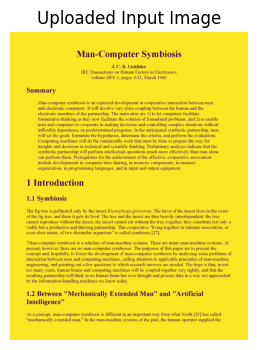

In [15]:
def upload_image():
  """
  Prompt the user to upload an image and save it to the working directory.
  Returns:
      Path object pointing to the uploaded image file.
  """
  uploaded = files.upload()  # Opens upload dialog
  if not uploaded:
      raise ValueError("No file uploaded.")
  # Get the first uploaded filename
  filename = next(iter(uploaded.keys()))
  print(f"Uploaded file: {filename}")
  return Path(filename)

your_img_path = upload_image()
your_img = Image.open(your_img_path)
plt.figure(figsize=(4,4))
plt.imshow(your_img)
plt.axis('off')
plt.title("Uploaded Input Image")
plt.show()

### 4-2. 🔧 Prepare for Optimization & 👀 Preview It  
> This step turns your image black-and-white for Swell by Light, applying any pre-processing like resizing or normalization, then show a quick preview so you can confirm it looks right before proceeding.

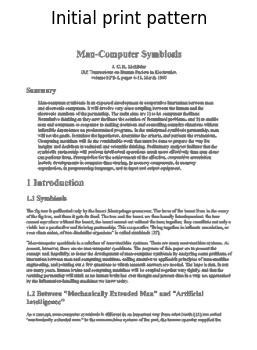

In [16]:
mask_yours, H_init_yours, max_heat_yours = image_to_heat_pattern(your_img_path, cfg)
visualize_init_pattern(H_init_yours, max_heat_yours)

### 4-3. 🔁 Run Optimization  
> This process adjusts your image into a print-ready pattern that compensates for heat spread. This is where the magic happens! "Optimization" here means transforming darker/lighter areas so that after heating, the texture matches your original design.

In [17]:
%%time
# Set the maximum height of the output
display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'))

# Compute physical dimensions (for logging)
img_w_yours, img_h_yours, phys_w_yours, phys_h_yours = compute_dims(Image.open(your_img_path))

# Optimize
T_best_yours, H_best_yours, errors_yours = optimize(mask_yours, H_init_yours, max_heat_yours, img_w_yours, img_h_yours, phys_w_yours, phys_h_yours, cfg)
print(f"Optimization completed in {len(errors_yours)} iterations.")

<IPython.core.display.Javascript object>

2025-08-01 17:33:00,617 [INFO] Iteration 1: Outlier = 16%
2025-08-01 17:33:00,932 [INFO] Iteration 2: Outlier = 15%
2025-08-01 17:33:01,202 [INFO] Iteration 3: Outlier = 14%
2025-08-01 17:33:01,459 [INFO] Iteration 4: Outlier = 14%
2025-08-01 17:33:01,713 [INFO] Iteration 5: Outlier = 14%
2025-08-01 17:33:01,992 [INFO] Iteration 6: Outlier = 13%
2025-08-01 17:33:02,255 [INFO] Iteration 7: Outlier = 13%
2025-08-01 17:33:02,514 [INFO] Iteration 8: Outlier = 13%
2025-08-01 17:33:02,785 [INFO] Iteration 9: Outlier = 13%
2025-08-01 17:33:03,045 [INFO] Iteration 10: Outlier = 13%
2025-08-01 17:33:03,302 [INFO] Iteration 11: Outlier = 13%
2025-08-01 17:33:03,560 [INFO] Iteration 12: Outlier = 12%
2025-08-01 17:33:03,832 [INFO] Iteration 13: Outlier = 12%
2025-08-01 17:33:04,094 [INFO] Iteration 14: Outlier = 12%
2025-08-01 17:33:04,358 [INFO] Iteration 15: Outlier = 12%
2025-08-01 17:33:04,611 [INFO] Iteration 16: Outlier = 12%
2025-08-01 17:33:04,876 [INFO] Iteration 17: Outlier = 12%
2025-0

Optimization completed in 202 iterations.
CPU times: user 53.2 s, sys: 134 ms, total: 53.4 s
Wall time: 53.7 s


### 4-4. 👀 Save & Preview Optimized Pattern  
> The notebook saves the optimized pattern as a PDF file, then embeds a preview right here so you can inspect the layout and dark/light regions before downloading.

In [18]:
# Save pattern PDF
pattern_pdf_yours = save_pattern(your_img_path, H_best_yours, max_heat_yours)
print(f"Saved optimized pattern to: {pattern_pdf_yours}")

# Display the generated PDF inline in Colab
with open(pattern_pdf_yours, "rb") as pdf_file:
    encoded_pdf_yours = base64.b64encode(pdf_file.read()).decode('utf-8')
IFrame(f"data:application/pdf;base64,{encoded_pdf_yours}", width=400, height=400)

Saved optimized pattern to: /content/Man-Computer Symbiosis_opt.pdf


###4-5. 👀 Show Swell Pattern & Temperature Distribution

> See side-by-side visualizations of the final raised texture (swell pattern) and temperature across the sheet (temperature distribution).

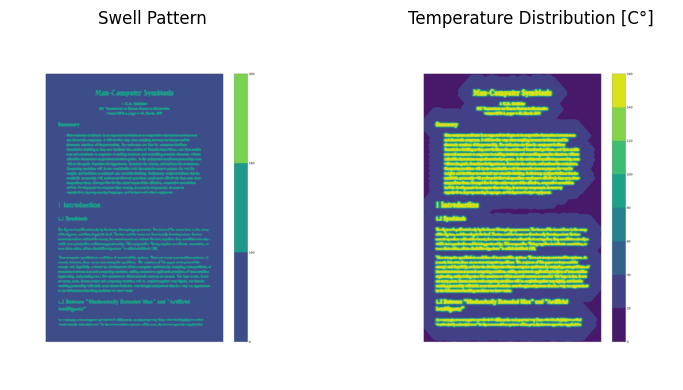

In [19]:
# Save and display plots with matplotlib
plots_yours = save_plots(T_best_yours, phys_w_yours, phys_h_yours, your_img_path, dpi=72)
display_plots(plots_yours)

###4-6. 💾 Download Optimized Pattern

>Finally, grab the PDF file you just created. You’re ready to print and experiment!

In [20]:
download_pdf(pattern_pdf_yours)

Do you want to download the optimized PDF? (y/n): y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###4-7. 📉 (Optional) Show Optimization Performance

>If you are curious, check out simple metrics or logs showing how many iterations the optimizer ran and how it improved the pattern.

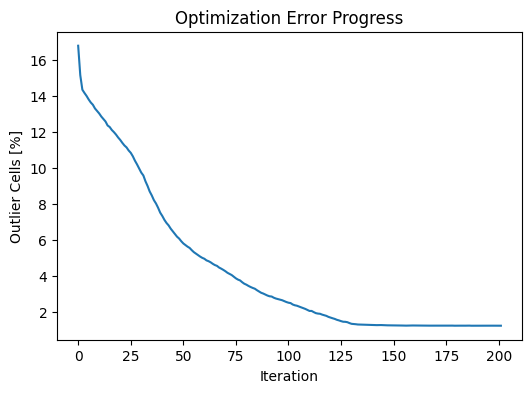

In [21]:
plot_error_progression(errors_yours, cfg)

##5. Change Configuration
**Overview:** We optimize the pattern of your choice.
0. **If you skip Sec. 3 & 4**,  Define Previous Functions
1. ⚙️ Customize Settings
2. 📁 Upload Your Pattern
3. 🔧 Prepare for Optimization & 👀 Preview It
4. 🔁 Run Optimization with Custom Settings
5. 👀 Save & Preview Optimized Pattern
6. 👀 Show Swell Pattern & Temperature Distribution
7. 💾 Download Optimized Pattern
8. 📉 (Optional) Show Optimization Performance

###5-0. **If you skip Sec. 3 & 4**,  Define Previous Functions
>If you are jumping straight into this section without running the Section 3 & 4, this cell re-loads or re-defines all helper functions (like config loading, and optimization routines) so everything runs smoothly.

In [22]:
# Locate the bundled config.json inside the installed package
def get_default_config_path():
    return pkg_resources.as_file(
        pkg_resources.files("sbl_optimizer.assets") / "config.json"
    )

# Visualize the initialized print pattern using matplotlib
def visualize_init_pattern(H_init, max_heat):
  plt.figure(figsize=(4,4))
  plt.imshow(H_init/max_heat, cmap='gray_r', vmin=0.0, vmax=1.0)
  plt.axis('off')
  plt.title("Initial print pattern")
  plt.show()

# Visualize the swell pattern and temperature distribution using matplotlib heatmap
def display_plots(plots):
  fig, (ax_swell, ax_temperature) = plt.subplots(1, 2, figsize=(4 * 2, 4))
  img_plot = Image.open(plots[0])
  ax_swell.imshow(img_plot)
  ax_swell.axis('off')
  ax_swell.set_title('Swell Pattern')
  img_plot = Image.open(plots[1])
  ax_temperature.imshow(img_plot)
  ax_temperature.axis('off')
  ax_temperature.set_title('Temperature Distribution [C°]')
  plt.tight_layout()
  plt.show()

# Ask user if they want to download the PDF locally
def download_pdf(pdf_file):
  download_choice = input('Do you want to download the optimized PDF? (y/n): ').strip().lower()
  if download_choice == 'y':
      files.download(str(pdf_file))

# Plot normalized error progression over iterations
def plot_error_progression(errors, cfg):
  errors_norm = [e * 100 / cfg.resolution for e in errors]
  plt.figure(figsize=(6,4))
  plt.plot(errors_norm)
  plt.xlabel('Iteration')
  plt.ylabel('Outlier Cells [%]')
  plt.title('Optimization Error Progress')
  plt.show()

# Upload image
def upload_image():
  """
  Prompt the user to upload an image and save it to the working directory.
  Returns:
      Path object pointing to the uploaded image file.
  """
  uploaded = files.upload()  # Opens upload dialog
  if not uploaded:
      raise ValueError("No file uploaded.")
  # Get the first uploaded filename
  filename = next(iter(uploaded.keys()))
  print(f"Uploaded file: {filename}")
  return Path(filename)

###5-1. ⚙️ Customize Settings

| Key | Type | Default | Description |
|-----|------|---------|-------------|
| `swell_temperature` | float | 145 [C°] | Target swelling temperature. Adjust this based on the swell temperature of the paste you have. |
| `light_power`       | float | 100.0 [W] |Light source power. Adjust this according to your light's power. |
| `light_diameter`    | float | 0.06 [m] | Diameter of the light circle on paper (m). Adjust based on the light circle diameter during heating. |
| `alpha`             | float | 5e-07 [m²/s] | Thermal diffusivity of paper. |
| `verbose`           | int   | 1 | Bool enabling logging. 0: turned off; 1: turned on. |
| `resolution`        | int   | 120000 | Number of cells paper is divided into in thermal simulations. Reduce this for faster optimization. Increase for a finer result. |

> Customize the simulation settings according to your setup. Change the numbers in the following cell:



In [23]:
custom_cfg_contents = {
    "swell_temperature": 140.0,
    "light_power": 120.0,
    "light_diameter": 0.08,
    "alpha": 5e-07,
    "verbose": 0,
    "resolution": 240000
}

In [24]:
# Write to a JSON file in the notebook workspace
custom_config_path = Path("custom_config.json")
with open(custom_config_path, "w") as f:
    json.dump(custom_cfg_contents, f, indent=4)
print(f"Custom config written to: {custom_config_path}")

# Load and instantiate Config from this custom file
cfg_custom = Config.from_file(custom_config_path)
print("Loaded custom Config:")
for k, v in custom_cfg_contents.items():
    print(f"- {k}: {v}")

Custom config written to: custom_config.json
Loaded custom Config:
- swell_temperature: 140.0
- light_power: 120.0
- light_diameter: 0.08
- alpha: 5e-07
- verbose: 0
- resolution: 240000


###5-2. 📁 Upload Your Pattern (.jpg or .png)
> Use this widget to select your own JPG or PNG image from your computer. Once you click Choose Files and pick your image, it will appear below.

Saving Man-Computer Symbiosis.jpg to Man-Computer Symbiosis (1).jpg
Uploaded file: Man-Computer Symbiosis (1).jpg


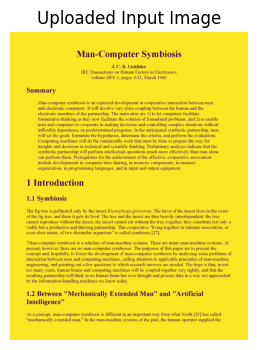

In [25]:
your_img_path_c = upload_image()
your_img_c = Image.open(your_img_path_c)
plt.figure(figsize=(4,4))
plt.imshow(your_img_c)
plt.axis('off')
plt.title("Uploaded Input Image")
plt.show()

### 5-3. 🔧 Prepare for Optimization & 👀 Preview It  
> This step turns your image black-and-white for Swell by Light, applying any pre-processing like resizing or normalization, then show a quick preview so you can confirm it looks right before proceeding.

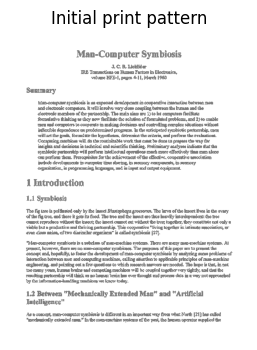

In [26]:
mask_yours_c, H_init_yours_c, max_heat_yours_c = image_to_heat_pattern(your_img_path_c, cfg_custom)
visualize_init_pattern(H_init_yours_c, max_heat_yours_c)

###5-4. 🔁 Run Optimization with Custom Settings
> This process adjusts your image into a print-ready pattern that compensates for heat spread. The simulation is based on the custom parameters you set [here](#scrollTo=jNyYGd1sY4Z_). This is where the magic happens! "Optimization" here means transforming darker/lighter areas so that after heating, the texture matches your original design.

In [27]:
%%time
# Set the maximum height of the output
display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'))

# Compute physical dimensions (for logging)
img_w_yours_c, img_h_yours_c, phys_w_yours_c, phys_h_yours_c = compute_dims(Image.open(your_img_path_c))

# Optimize
T_best_yours_c, H_best_yours_c, errors_yours_c = optimize(mask_yours_c, H_init_yours_c, max_heat_yours_c, img_w_yours_c, img_h_yours_c, phys_w_yours_c, phys_h_yours_c, cfg_custom)
print(f"Optimization completed in {len(errors_yours_c)} iterations.")

<IPython.core.display.Javascript object>

Optimization completed in 144 iterations.
CPU times: user 2min 26s, sys: 208 ms, total: 2min 26s
Wall time: 2min 29s


### 5-5. 👀 Save & Preview Optimized Pattern  
> The notebook saves the optimized pattern as a PDF file, then embeds a preview right here so you can inspect the layout and dark/light regions before downloading.

In [28]:
# Save pattern PDF
pattern_pdf_yours_c = save_pattern(your_img_path_c, H_best_yours_c, max_heat_yours_c)
print(f"Saved optimized pattern to: {pattern_pdf_yours_c}")

# Display the generated PDF inline in Colab
with open(pattern_pdf_yours_c, "rb") as pdf_file:
    encoded_pdf_yours_c = base64.b64encode(pdf_file.read()).decode('utf-8')
IFrame(f"data:application/pdf;base64,{encoded_pdf_yours_c}", width=400, height=400)

Saved optimized pattern to: /content/Man-Computer Symbiosis (1)_opt.pdf


###5-6. 👀 Show Swell Pattern & Temperature Distribution

> See side-by-side visualizations of the final raised texture (swell pattern) and temperature across the sheet (temperature distribution).

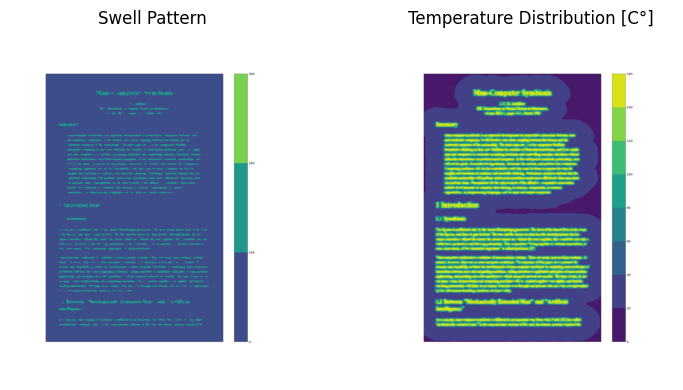

In [29]:
# Save and display plots with matplotlib
plots_yours_c = save_plots(T_best_yours_c, phys_w_yours_c, phys_h_yours_c, your_img_path_c, dpi=72)
display_plots(plots_yours_c)

###5-7. 💾 Download Optimized Pattern

>Finally, grab the PDF file you just created. You’re ready to print and experiment!

In [31]:
download_pdf(pattern_pdf_yours_c)

Do you want to download the optimized PDF? (y/n): y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###5-8. 📉 (Optional) Show Optimization Performance

>If you are curious, check out simple metrics or logs showing how many iterations the optimizer ran and how it improved the pattern.

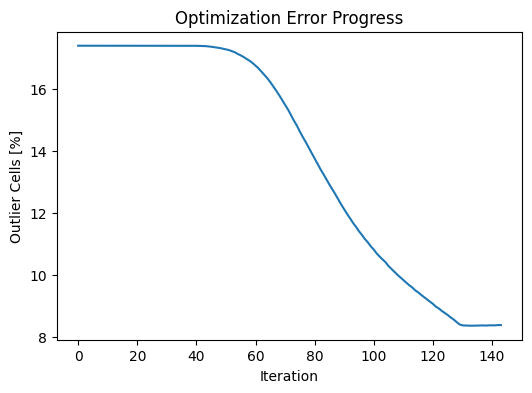

In [32]:
plot_error_progression(errors_yours_c, cfg_custom)

## 6. Troubleshooting & FAQ

**Q: What file types work?**  
A: You can upload JPG or PNG images.

**Q: My image didn’t upload.**  
A: Make sure you click the **Choose Files** button and pick a valid image. Re-run the cell if it fails.

**Q: I see an error during optimization.**  
A: Check that your file is not too large. Try a smaller image and re-run.

**Q: How long does it take?**  
A: On Colab, it may take a minute or two.

**Tip:** If something goes wrong, restart the notebook (Runtime → Restart runtime) and re-run from the top.

## 7. Credits & License
###License
>This project is licensed under the [MIT License](https://github.com/sosucat/sbl-optimizer/blob/main/LICENSE).


###Developer
>Sosuke Ichihashi

> [![Sosuke Ichihashi](https://img.shields.io/badge/Sosuke_Ichihashi-black?logo=googlescholar&logoColor=white)](https://sosuke-ichihashi.com/)
[![@sosucat](https://img.shields.io/badge/@sosucat-black?logo=github&logoColor=white)](https://github.com/sosucat)
[![@RefreshSource](https://img.shields.io/badge/@RefreshSource-black?logo=x&logoColor=white)](https://x.com/refreshsource)


###Cite this work
> If you use **sbl-optimizer** in your research or projects, please cite:
* Sosuke Ichihashi, Noura Howell, and HyunJoo Oh. 2025.\
Swell by Light: An Approachable Technique for Freeform Raised Textures. \
In Proceedings of the Nineteenth International Conference on Tangible, Embedded, and Embodied Interaction (TEI '25). Association for Computing Machinery, New York, NY, USA, Article 45, 1–16. https://doi.org/10.1145/3689050.3704420
```bibtex
@inproceedings{10.1145/3689050.3704420,
author = {Ichihashi, Sosuke and Howell, Noura and Oh, HyunJoo},
title = {Swell by Light: An Approachable Technique for Freeform Raised Textures},
year = {2025},
isbn = {9798400711978},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3689050.3704420},
doi = {10.1145/3689050.3704420},
booktitle = {Proceedings of the Nineteenth International Conference on Tangible, Embedded, and Embodied Interaction},
articleno = {45},
numpages = {16},
keywords = {2.5D fabrication, Personal fabrication, tactile rendering},
location = {Bordeaux / Talence, France},
series = {TEI '25}
}
```

## 8. Next Steps
**Ready for more? Here’s where to explore further:**


🎨 **Fabrication Tutorial**

> See the step-by-step fabrication tutorial on our website and YouTube.

>[![Fabrication](https://img.shields.io/badge/🔗_Fabrication-black)](https://sites.gatech.edu/futurefeelings/2025/07/23/make-puffy-patterns-with-light/)
[![Watch fabrication demo on YouTube](https://img.shields.io/badge/Fabrication-750014?logo=youtube)](https://youtu.be/LomVS_jHxl0?feature=shared)


🔗 **Project Page**

> Read more about the project and example applications on our project page.

>[![Project page](https://img.shields.io/badge/🔗_Project_Page-black)](https://sites.gatech.edu/futurefeelings/2025/03/07/swell-by-light-tei-25/)


📄 **Research Paper**

> Explore various application examples of Swell by Light and learn the theory and related work behind it in our paper.

>[![Research paper](https://img.shields.io/badge/Research_Paper-black?logo=acm)](https://doi.org/10.1145/3689050.3704420)


👩‍💻 **Local Command Line Interface**

> Follow the tutorials on PyPI or GitHub to use sbl-optimizer in a simpler way on your machine.

>[![PyPI version](https://badge.fury.io/py/sbl-optimizer.svg)](https://badge.fury.io/py/sbl-optimizer) [![GitHub](https://img.shields.io/badge/GitHub_Repo-black?logo=github)](https://github.com/sosucat/sbl-optimizer)


👨‍💻 **Source Code & Issues**

> Visit our GitHub repository to report issues, contribute, or see the latest developments.

>[![GitHub](https://img.shields.io/badge/GitHub_Repo-black?logo=github)](https://github.com/sosucat/sbl-optimizer)


🕵️‍♂️ **Author’s Website**

> Discover more work by Sosuke Ichihashi.

>[![Author](https://img.shields.io/badge/Author-black?logo=googlescholar&logoColor=white)](https://sosuke-ichihashi.com/)


*Happy fabricating!*